# 1- Check features after reducing cardinality
(the tables used in this notebook are created by `scripts/model1_preprocess_3`)

In [1]:
import yaml
import pandas as pd
import numpy as np

In [2]:
techniques_df = pd.read_pickle ('../data/processed/model1/processed_technnique_features.pkl')
groups_df = pd.read_pickle ('../data/processed/model1/processed_group_features.pkl')
train_labels_df = pd.read_pickle ('../data/processed/model1/processed_train_labels.pkl')
cv_labels_df = pd.read_pickle ('../data/processed/model1/processed_cv_labels.pkl')
resampled_train_labels_df = pd.read_pickle ('../data/processed/model1/resampled_train_labels.pkl')


In [5]:
print (train_labels_df['label'].value_counts())
print (resampled_train_labels_df['label'].value_counts())
print (cv_labels_df['label'].value_counts())


label
0.0    26069
1.0     2382
Name: count, dtype: int64
label
0.0    17376
1.0     5213
Name: count, dtype: int64
label
0.0    6577
1.0     593
Name: count, dtype: int64


In [3]:
train_labels_df

,group_ID,technique_ID,label
405,G0006,T1548.002,0.0
406,G0006,T1134,0.0
407,G0006,T1134.002,0.0
408,G0006,T1134.003,0.0
409,G0006,T1134.001,0.0
...,...,...,...
57100,G0045,T1102.002,0.0
57101,G0045,T1102.001,0.0
57102,G0045,T1102.003,0.0
57103,G0045,T1047,1.0


- Train / CV sample distribution


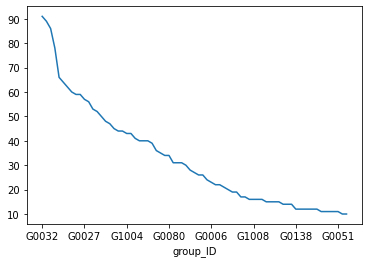

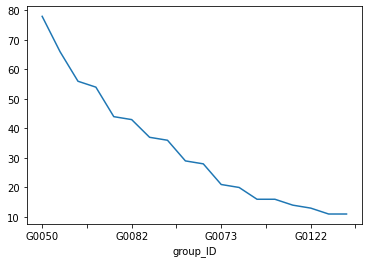

In [6]:
import matplotlib.pyplot as plt

pos_train = train_labels_df[train_labels_df['label']==1]
pos_cv = cv_labels_df[cv_labels_df['label']==1]
df_1 = pos_train
df_2 = pos_cv
df_1['group_ID'].value_counts().plot()
plt.show()
df_2['group_ID'].value_counts().plot()
plt.show()

In [ ]:
from statistics import mode
def get_feature_length_stats(df: pd.DataFrame()):
    for col in list (df.columns)[1:]:
        if not isinstance(df[col].iloc[0], list): print ('{col}: scalar'.format (col = col))
        else:
                list_lengths = df[col].apply(lambda x: len(x))
                avg_len = list_lengths.mean()
                mode_len = mode(list_lengths)
                max_len = list_lengths.max()
                print ('{col} \tmean_len: {mean_len}\tmode_len: {mode_len}\tmax_len: {max_len}'.format(col = col, mean_len= avg_len, mode_len = mode_len, max_len = max_len))
        
def get_vocab_size (df: pd.DataFrame):
    for feature_name in df.columns[1:]:
        if feature_name in ['input_group_description', 'input_technique_description', 'input_group_interaction_rate', 'input_technique_interaction_rate']: continue
        vocab_size = len(df[feature_name].explode().unique())
        print ('{feature_name}: vocab size = {vocab_size}'.format (feature_name = feature_name, vocab_size = vocab_size))

In [ ]:
print ("BEFORE")
get_feature_length_stats (techniques_org_df)
get_feature_length_stats (groups_org_df)
print ("AFTER")
get_feature_length_stats (techniques_df)
get_feature_length_stats (groups_df)

BEFORE
input_technique_data_sources 	mean_len: 3.154859967051071	mode_len: 3	max_len: 14
input_technique_detection_name 	mean_len: 3.154859967051071	mode_len: 3	max_len: 14
input_technique_mitigation_id 	mean_len: 2.1301482701812193	mode_len: 1	max_len: 11
input_technique_platforms 	mean_len: 2.510708401976936	mode_len: 1	max_len: 10
input_technique_software_id 	mean_len: 14.179571663920923	mode_len: 1	max_len: 334
input_technique_tactics 	mean_len: 1.2932454695222406	mode_len: 1	max_len: 4
input_technique_description: scalar
input_group_software_id 	mean_len: 6.1911764705882355	mode_len: 1	max_len: 46
input_group_description: scalar
AFTER
input_technique_data_sources 	mean_len: 2.7528830313014825	mode_len: 1	max_len: 9
input_technique_detection_name 	mean_len: 2.7528830313014825	mode_len: 1	max_len: 9
input_technique_mitigation_id 	mean_len: 1.9588138385502472	mode_len: 1	max_len: 8
input_technique_platforms 	mean_len: 2.510708401976936	mode_len: 1	max_len: 10
input_technique_software

In [ ]:
print ("BEFORE")
get_vocab_size (groups_org_df)
get_vocab_size (techniques_org_df)
print ("AFTER")
get_vocab_size (groups_df)
get_vocab_size (techniques_df)

BEFORE
input_group_software_id: vocab size = 464
input_technique_data_sources: vocab size = 106
input_technique_detection_name: vocab size = 106
input_technique_mitigation_id: vocab size = 44
input_technique_platforms: vocab size = 11
input_technique_software_id: vocab size = 636
input_technique_tactics: vocab size = 14
AFTER
input_group_software_id: vocab size = 224
input_group_tactics: vocab size = 15
input_technique_data_sources: vocab size = 15
input_technique_detection_name: vocab size = 15
input_technique_mitigation_id: vocab size = 17
input_technique_platforms: vocab size = 11
input_technique_software_id: vocab size = 272
input_technique_tactics: vocab size = 14


In [ ]:
feature_name = 'input_technique_software_id'
print ('BEFORE')
print (techniques_org_df[feature_name].explode(feature_name).value_counts())
print ('AFTER')
print (techniques_df[feature_name].explode(feature_name).value_counts())

BEFORE
input_technique_software_id
         201
s0363     72
s0260     72
s0154     72
s0650     71
        ... 
s0112      1
s0001      1
s0016      1
s0014      1
s0026      1
Name: count, Length: 636, dtype: int64
AFTER
input_technique_software_id
other    293
         201
s0154     72
s0363     72
s0260     72
        ... 
s0249     14
s0487     14
s0136     14
s0517     14
s0579     14
Name: count, Length: 272, dtype: int64


---

In [ ]:
for col in techniques_df.columns[1:-1]:
    print ('--------',col)
    feature_name = col
    print (techniques_df.explode(feature_name)[feature_name].value_counts())

-------- input_technique_data_sources
input_technique_data_sources
other                                                 312
command_command_execution                             268
process_process_creation                              226
network_traffic_network_traffic_content               108
file_file_modification                                104
process_os_api_execution                               94
file_file_creation                                     91
network_traffic_network_traffic_flow                   86
application_log_application_log_content                72
windows_registry_windows_registry_key_modification     65
network_traffic_network_connection_creation            61
module_module_load                                     54
file_file_access                                       47
file_file_metadata                                     44
                                                       39
Name: count, dtype: int64
-------- input_technique_detection_na

input_technique_description
 0.175284    3
 0.362935    3
-0.262985    3
-0.518338    3
-0.676892    3
            ..
-0.077117    1
 0.021594    1
-0.342149    1
 0.076021    1
 1.116899    1
Name: count, Length: 464544, dtype: int64


# 2 Check labels

In [10]:
train_labels = pd.read_pickle ('../data/processed/model1/processed_train_labels.pkl')
cv_labels = pd.read_pickle ('../data/processed/model1/processed_cv_labels.pkl')

In [12]:
train_techniques =  (train_labels[train_labels['label'] == 1]['technique_ID'].unique())
cv_techniques =  (cv_labels[cv_labels['label']==1]['technique_ID'].unique())
unused_train_techniques = np.setdiff1d (cv_techniques, train_techniques)
print (unused_train_techniques)

['T1001.002' 'T1021.007' 'T1027.006' 'T1029' 'T1036.007' 'T1052.001'
 'T1053' 'T1055.004' 'T1056.004' 'T1074' 'T1087.004' 'T1090.004'
 'T1098.005' 'T1137.006' 'T1187' 'T1222.001' 'T1491.002' 'T1499'
 'T1546.013' 'T1547.004' 'T1547.012' 'T1553' 'T1556.007' 'T1558.001'
 'T1563.002' 'T1566' 'T1584.003' 'T1584.005' 'T1584.006' 'T1586.003'
 'T1588.006' 'T1590.001' 'T1593' 'T1608' 'T1614.001' 'T1615' 'T1649'
 'T1651']


- Some of the Techniques are only used in one of the Train or CV set but not both

In [13]:
type (train_labels[train_labels['label'] == 1]['technique_ID'].unique())

numpy.ndarray

In [93]:
labels_org_df.columns == labels_df.columns

array([ True,  True,  True])

## 2b- Check resampled data

In [94]:
train_y_df = pd.read_csv ('../data/processed/model1/train_y_split.csv')
# train_cv_y_df = pd.read_csv ('../data/processed/model1/train_cv_y_split.csv')
cv_y_df = pd.read_csv ('../data/processed/model1/cv_y_split.csv')
# test_y_df = pd.read_csv ('../data/processed/model1/test_y_split.csv')
train_y_resampled_df = pd.read_csv ('../data/processed/model1/train_y_resampled.csv')


FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/model1/train_y_split.csv'

In [ ]:
for df in [train_y_df, train_y_resampled_df,cv_y_df]:
    print (df.shape, 'no. of groups: {n}'.format(n =  df['group_ID'].nunique()))
    print (df['label'].value_counts())

(20480, 3) no. of groups: 54
label
0.0    18473
1.0     2007
Name: count, dtype: int64
(16007, 3) no. of groups: 54
label
0.0    12313
1.0     3694
Name: count, dtype: int64
(5204, 3) no. of groups: 14
label
0.0    4640
1.0     564
Name: count, dtype: int64


# 3 Check exported dataset

In [ ]:
import tensorflow as tf

In [ ]:
train_dataset = tf.data.Dataset.load ('../data/processed/model1/train_dataset/')
cv_dataset = tf.data.Dataset.load ('../data/processed/model1/cv_dataset/')
# test_dataset = tf.data.Dataset.load ('../data/processed/model1/test_dataset/')
inputs = cv_dataset.element_spec[0]

In [ ]:
cv_dataset.element_spec[0]

{'input_technique_interaction_rate': TensorSpec(shape=(1,), dtype=tf.float32, name=None),
 'input_technique_software_id': RaggedTensorSpec(TensorShape([None]), tf.string, 0, tf.int64),
 'input_technique_platforms': RaggedTensorSpec(TensorShape([None]), tf.string, 0, tf.int64),
 'input_group_tactics': RaggedTensorSpec(TensorShape([None]), tf.string, 0, tf.int64),
 'input_technique_description': TensorSpec(shape=(768,), dtype=tf.float32, name=None),
 'input_technique_data_sources': RaggedTensorSpec(TensorShape([None]), tf.string, 0, tf.int64),
 'input_group_interaction_rate': TensorSpec(shape=(1,), dtype=tf.float32, name=None),
 'input_technique_tactics': RaggedTensorSpec(TensorShape([None]), tf.string, 0, tf.int64),
 'input_group_software_id': RaggedTensorSpec(TensorShape([None]), tf.string, 0, tf.int64),
 'input_group_description': TensorSpec(shape=(768,), dtype=tf.float32, name=None),
 'input_technique_mitigation_id': RaggedTensorSpec(TensorShape([None]), tf.string, 0, tf.int64),
 'in

In [ ]:
input_technique = [item for item in list(inputs.keys()) if item.startswith ('input_technique')]
input_technique

['input_technique_interaction_rate',
 'input_technique_software_id',
 'input_technique_platforms',
 'input_technique_description',
 'input_technique_data_sources',
 'input_technique_tactics',
 'input_technique_mitigation_id',
 'input_technique_detection_name']

In [ ]:
input_group = [item for item in list(inputs.keys()) if item.startswith ('input_group')]
input_group

['input_group_tactics',
 'input_group_interaction_rate',
 'input_group_software_id',
 'input_group_description']

In [ ]:
# import tensorflow as tf
# count_zeros = 0
# count_ones = 0
# for features, labels in train_dataset:
#     # 'labels' will be the second element in each tuple
#     labels_array = labels.numpy()  # Convert labels tensor to numpy array
    
#     # Count occurrences of 0 and 1 in the labels
#     count_zeros += (labels_array == 0).sum()
#     count_ones += (labels_array == 1).sum()

# # Print the counts
# print(f"Number of zeros: {count_zeros}")
# print(f"Number of ones: {count_ones}")

In [ ]:
# count_zeros = 0
# count_ones = 0
# for features, labels in cv_dataset:
#     # 'labels' will be the second element in each tuple
#     labels_array = labels.numpy()  # Convert labels tensor to numpy array
    
#     # Count occurrences of 0 and 1 in the labels
#     count_zeros += (labels_array == 0).sum()
#     count_ones += (labels_array == 1).sum()

# # Print the counts
# print(f"Number of zeros: {count_zeros}")
# print(f"Number of ones: {count_ones}")